In [272]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline

In [273]:
data = pd.read_csv("C:/Users/MrWhi/OneDrive/Desktop/univpm/DataScience/Progetto_Datascience/python/london_weather.csv")

data.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [274]:
# Lista delle colonne da riempire con la media
columns_to_fill = [
    "cloud_cover",
    "global_radiation",
    "max_temp",
    "mean_temp",
    "min_temp",
    "precipitation",
    "snow_depth",
    "pressure"
]

# Riempire i valori mancanti con la media
for col in columns_to_fill:
    data[col] = data[col].fillna(data[col].mean())

In [275]:
# Assicurati che l'indice delle date sia in formato datetime
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')  # Assicurati che la colonna delle date sia nel formato giusto
data.set_index('date', inplace=True)


In [276]:
data.isnull().sum()

cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

In [277]:
data.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


TIME SERIES


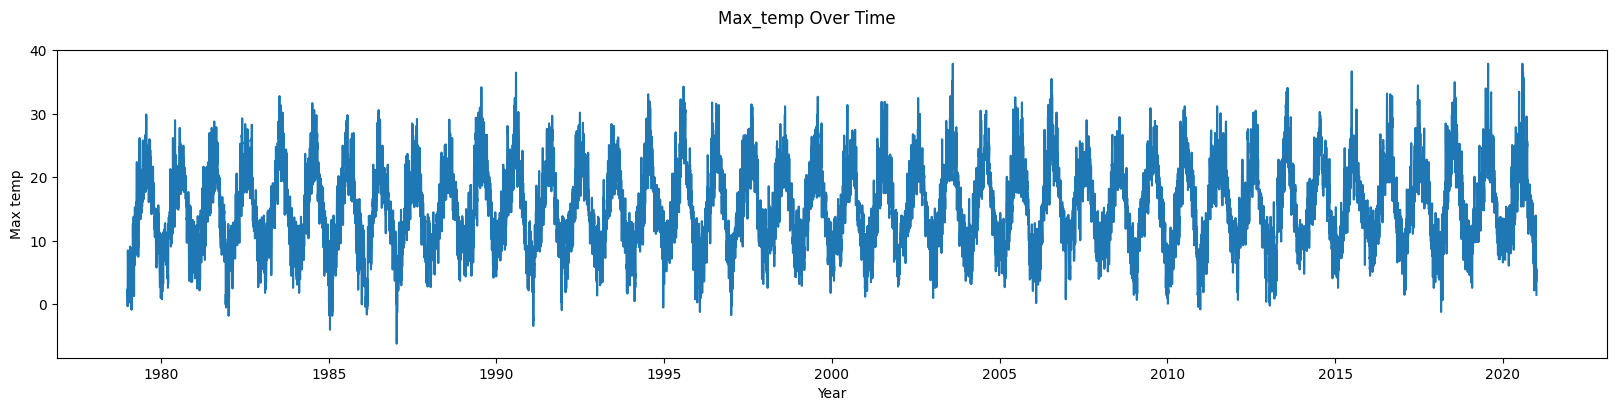

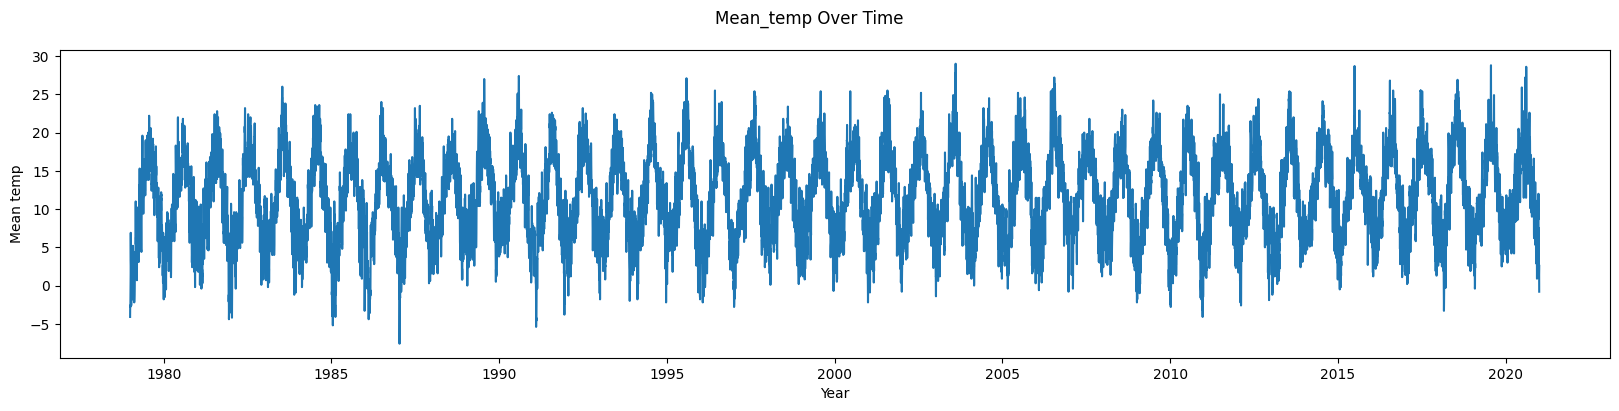

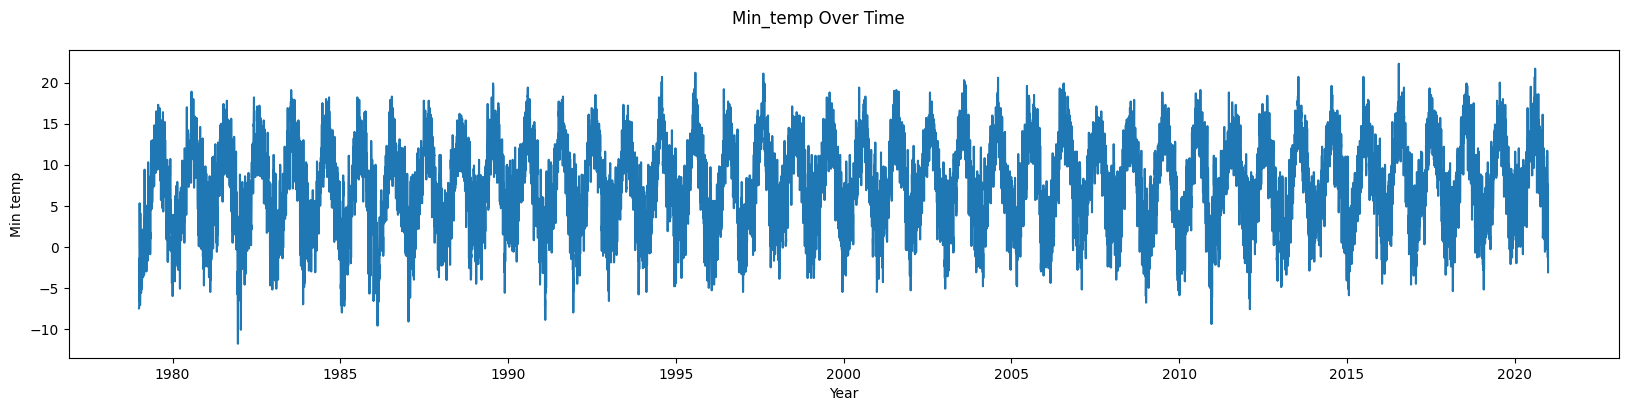

In [278]:
import matplotlib.pyplot as plt

# Lista delle colonne da plottare
columns = ["max_temp", "mean_temp", "min_temp"]

# Itera sulle colonne e crea un grafico per ciascuna
for col in columns:
    plt.figure(figsize=(20, 4))
    plt.suptitle(f'{col.capitalize()} Over Time')
    ax = plt.gca()
    ax.set_xlabel('Year')
    ax.set_ylabel(col.replace('_', ' ').capitalize())
    plt.plot(data.index, data[col])
    plt.show()


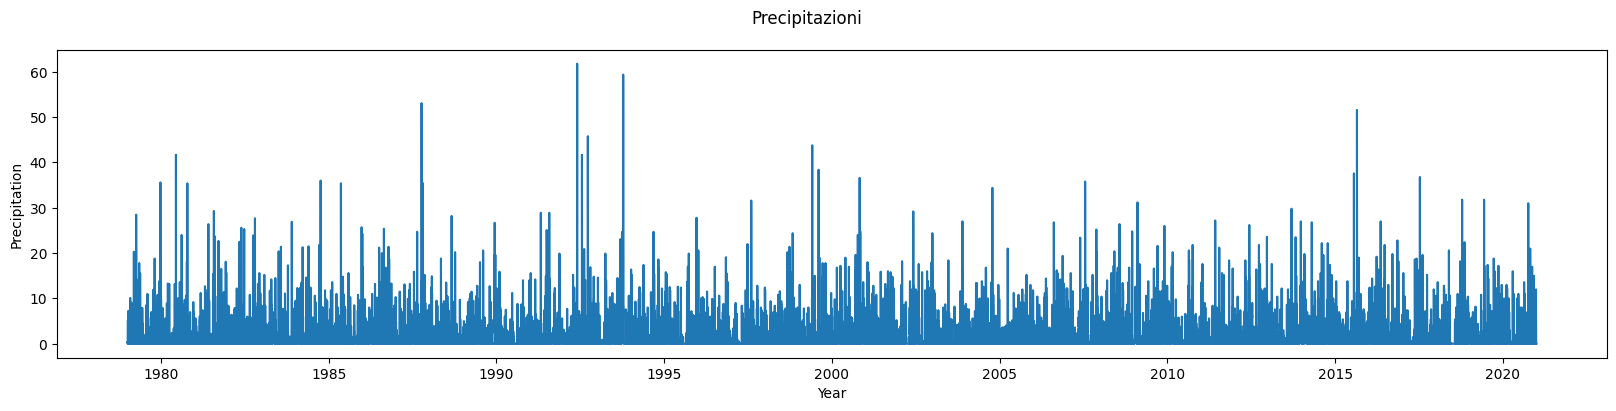

In [279]:
plt.figure(figsize=(20,4))
plt.suptitle('Precipitazioni')
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Precipitation')
plt.plot(data.index, data['precipitation'])
plt.show()

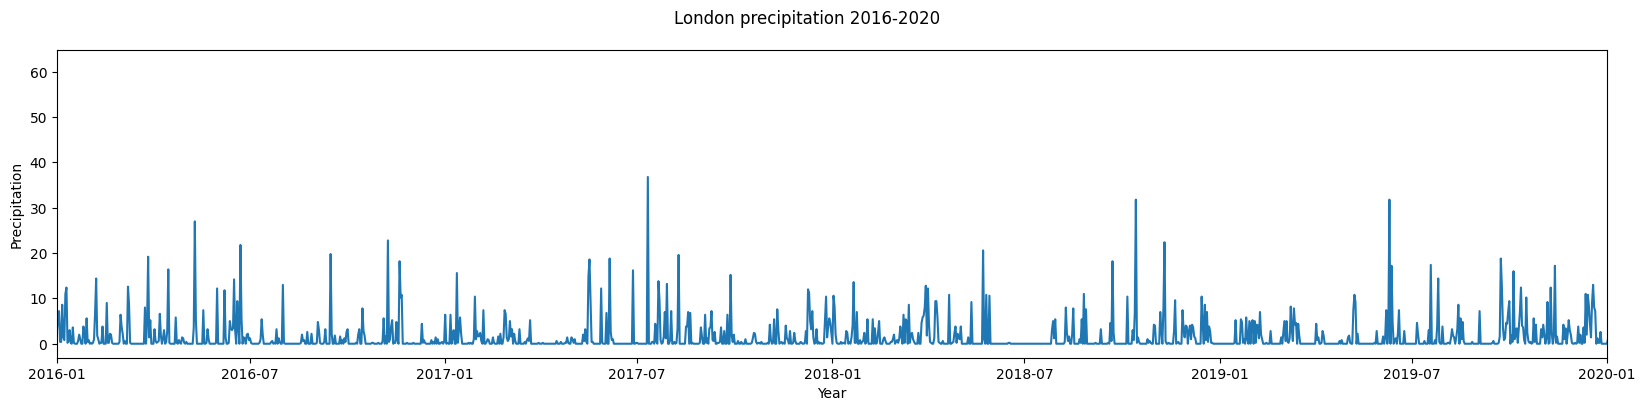

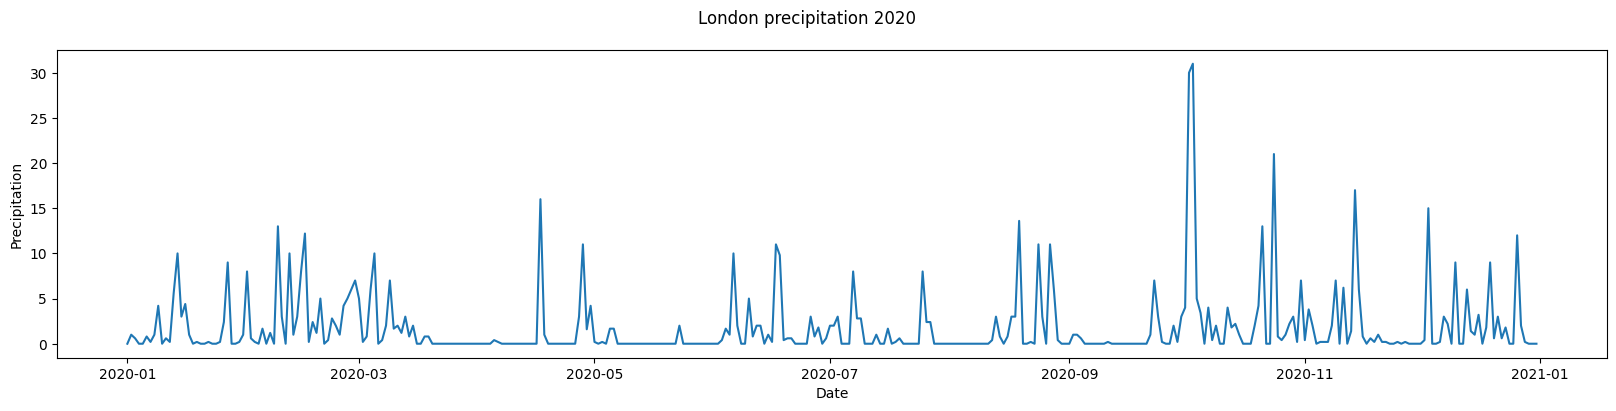

In [280]:
# Intervallo temporale per 2016-2020
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2020, 1, 1)

# Creazione del primo grafico (2016-2020)
plt.figure(figsize=(20, 4))
plt.suptitle('London precipitation 2016-2020')
ax = plt.gca()
ax.set_xlim(start, end)
ax.set_xlabel('Year')
ax.set_ylabel('Precipitation')
plt.plot(data.index, data['precipitation'])
plt.show()

# Filtro dei dati per l'anno 2020
data_2020 = data[(data.index.year == 2020)]

# Creazione del secondo grafico (2020)
plt.figure(figsize=(20, 4))
plt.suptitle('London precipitation 2020')
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation')
plt.plot(data_2020.index, data_2020['precipitation'])
plt.show()

In [281]:
from statsmodels.tsa.stattools import adfuller

# Test di stazionarietà con ADF
X = data['precipitation'].values
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))



ADF Statistic: -40.013708
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


<Figure size 1200x600 with 0 Axes>

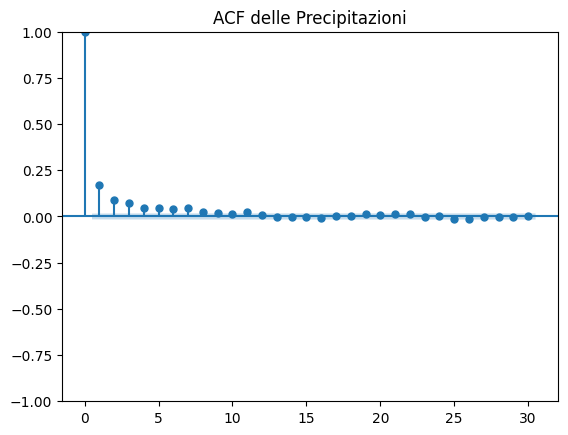

<Figure size 1200x600 with 0 Axes>

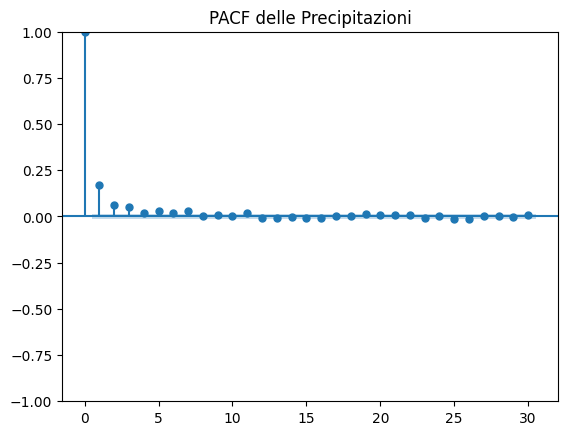

In [282]:

# Pulizia dati (rimozione NaN)
precipitation_clean = data['precipitation'].dropna()

# Grafico ACF
plt.figure(figsize=(12, 6))
plot_acf(precipitation_clean, lags=30, alpha=0.05, title='ACF delle Precipitazioni')
plt.show()

# Grafico PACF
plt.figure(figsize=(12, 6))
plot_pacf(precipitation_clean, lags=30, alpha=0.05, method='ols', title='PACF delle Precipitazioni')
plt.show()

In [283]:
# Costruzione del modello SARIMAX (AR(1))
mod = sm.tsa.SARIMAX(data['precipitation'], order=(1, 0, 0), trend='c')

# Stima i parametri del modello
res = mod.fit()

# Stampa i risultati del modello AR(1)
print(res.summary())

C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          precipitation   No. Observations:                15341
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -41765.654
Date:                Wed, 29 Jan 2025   AIC                          83537.309
Time:                        17:06:08   BIC                          83560.224
Sample:                    01-01-1979   HQIC                         83544.903
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3826      0.048     28.536      0.000       1.288       1.478
ar.L1          0.1714      0.005     33.996      0.000       0.162       0.181
sigma2        13.5602      0.057    237.031      0.0

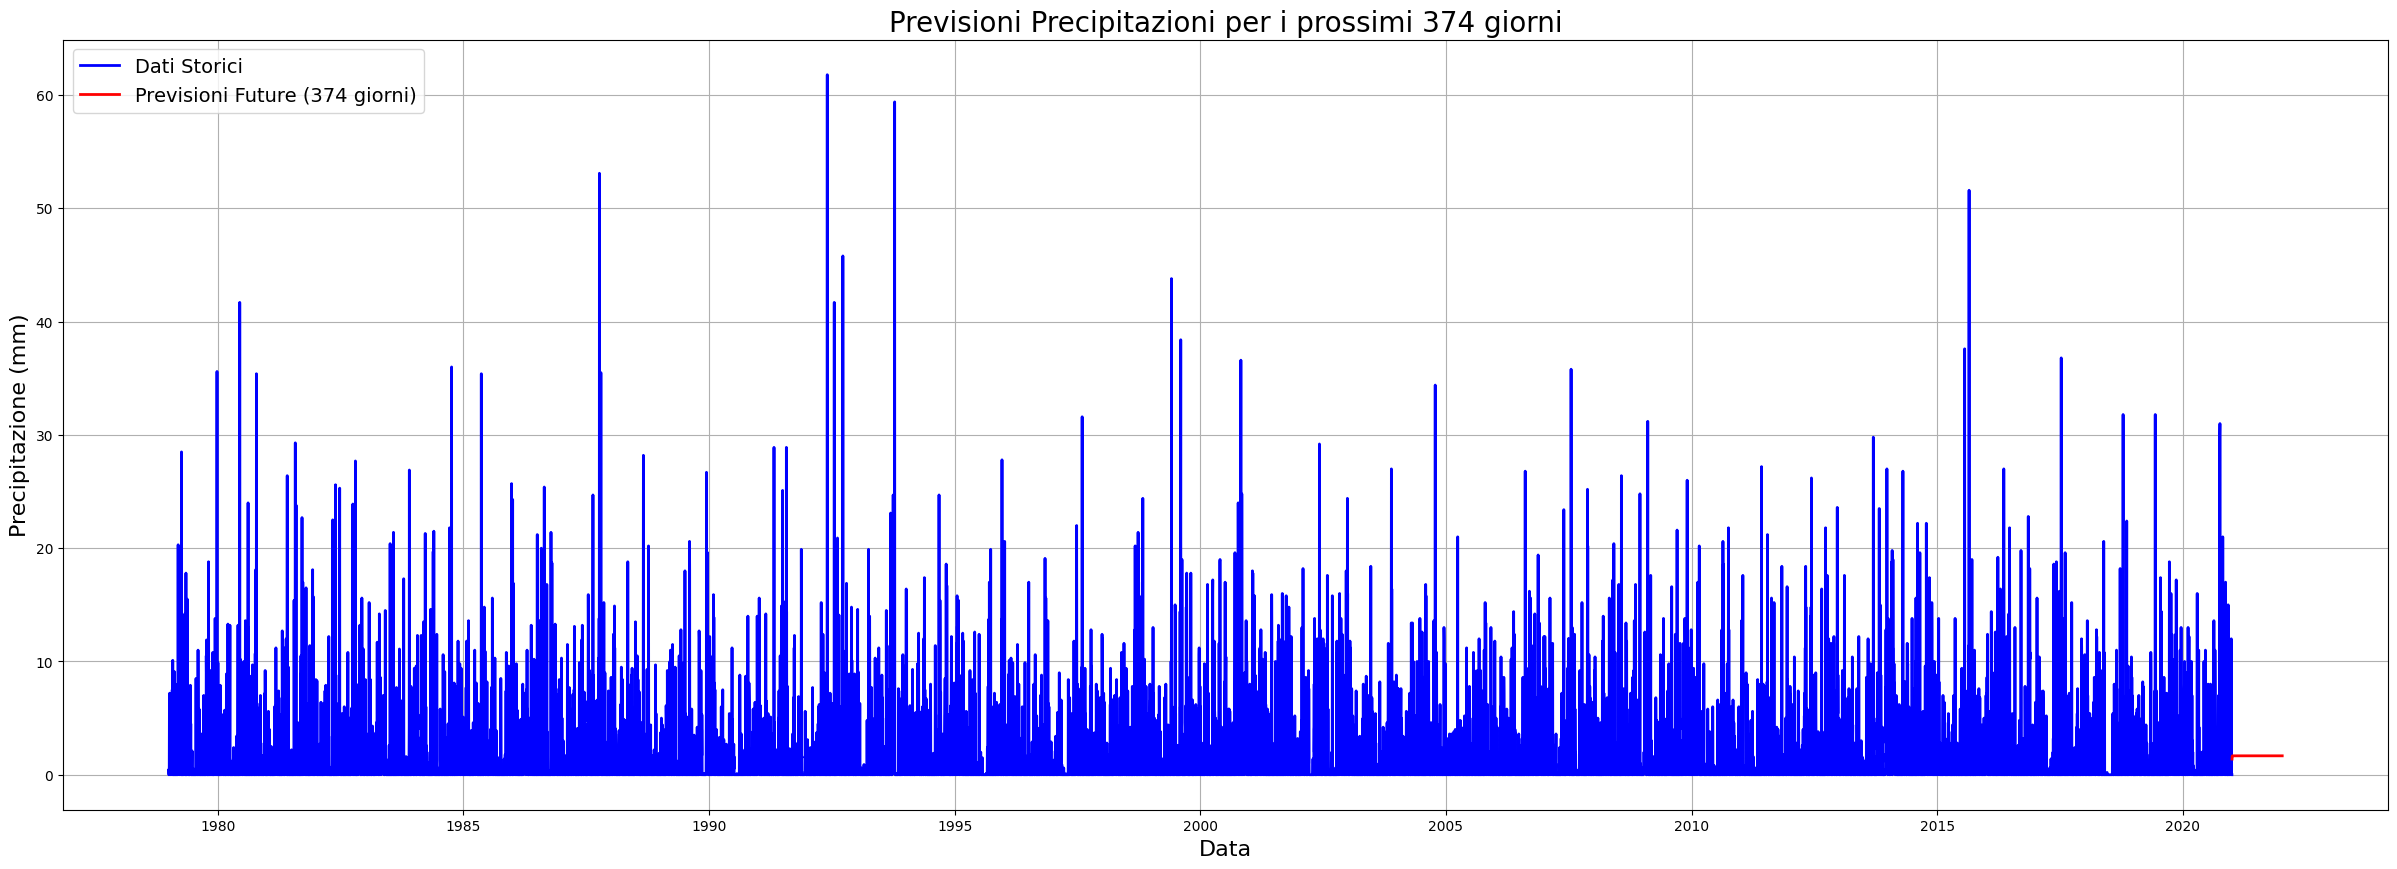

In [284]:
# Previsione per i prossimi 374 giorni (come hai richiesto)
forecast_steps = 374
forecast = res.get_prediction(start=len(data), end=len(data) + forecast_steps - 1, dynamic=False)

# Creazione dell'indice per la previsione futura
forecast_index = pd.date_range(data.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Estrai i valori di previsione
forecast_values = forecast.predicted_mean

# Creazione del grafico
plt.figure(figsize=(30, 10), dpi=100)
plt.plot(data.index, data['precipitation'], label='Dati Storici', color='b', linewidth=2)
plt.plot(forecast_index, forecast_values, label='Previsioni Future (374 giorni)', color='r', linewidth=2)
plt.title('Previsioni Precipitazioni per i prossimi 374 giorni', fontsize=20)
plt.xlabel('Data', fontsize=16)
plt.ylabel('Precipitazione (mm)', fontsize=16)
plt.legend(loc='upper left', fontsize=14)
plt.grid(True)
plt.show()

In [285]:
# Divisione dei dati in training e test (85% e 15%)
train_part = int(len(data) * 0.85)  # 85% dei dati per il training
test_part = len(data) - train_part  # 15% dei dati per il testing

train = data['precipitation'][:train_part]
test = data['precipitation'][train_part:]

# Costruzione del modello ARIMA
new_model = sm.tsa.ARIMA(train, order=(1, 0, 3))  # Modello ARIMA (1, 0, 3)
# Stima dei parametri del modello
new_results = new_model.fit()

# Stampa i risultati del modello
print(new_results.summary())

# Previsione sui dati di test (opzionale, se desideri fare un confronto con i dati reali)
forecast_values = new_results.forecast(steps=test_part)

C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          precipitation   No. Observations:                13039
Model:                 ARIMA(1, 0, 3)   Log Likelihood              -35399.805
Date:                Wed, 29 Jan 2025   AIC                          70811.610
Time:                        17:06:11   BIC                          70856.464
Sample:                    01-01-1979   HQIC                         70826.595
                         - 09-12-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6650      0.079     21.118      0.000       1.510       1.820
ar.L1          0.8337      0.028     29.554      0.000       0.778       0.889
ma.L1         -0.6754      0.029    -23.543      0.0

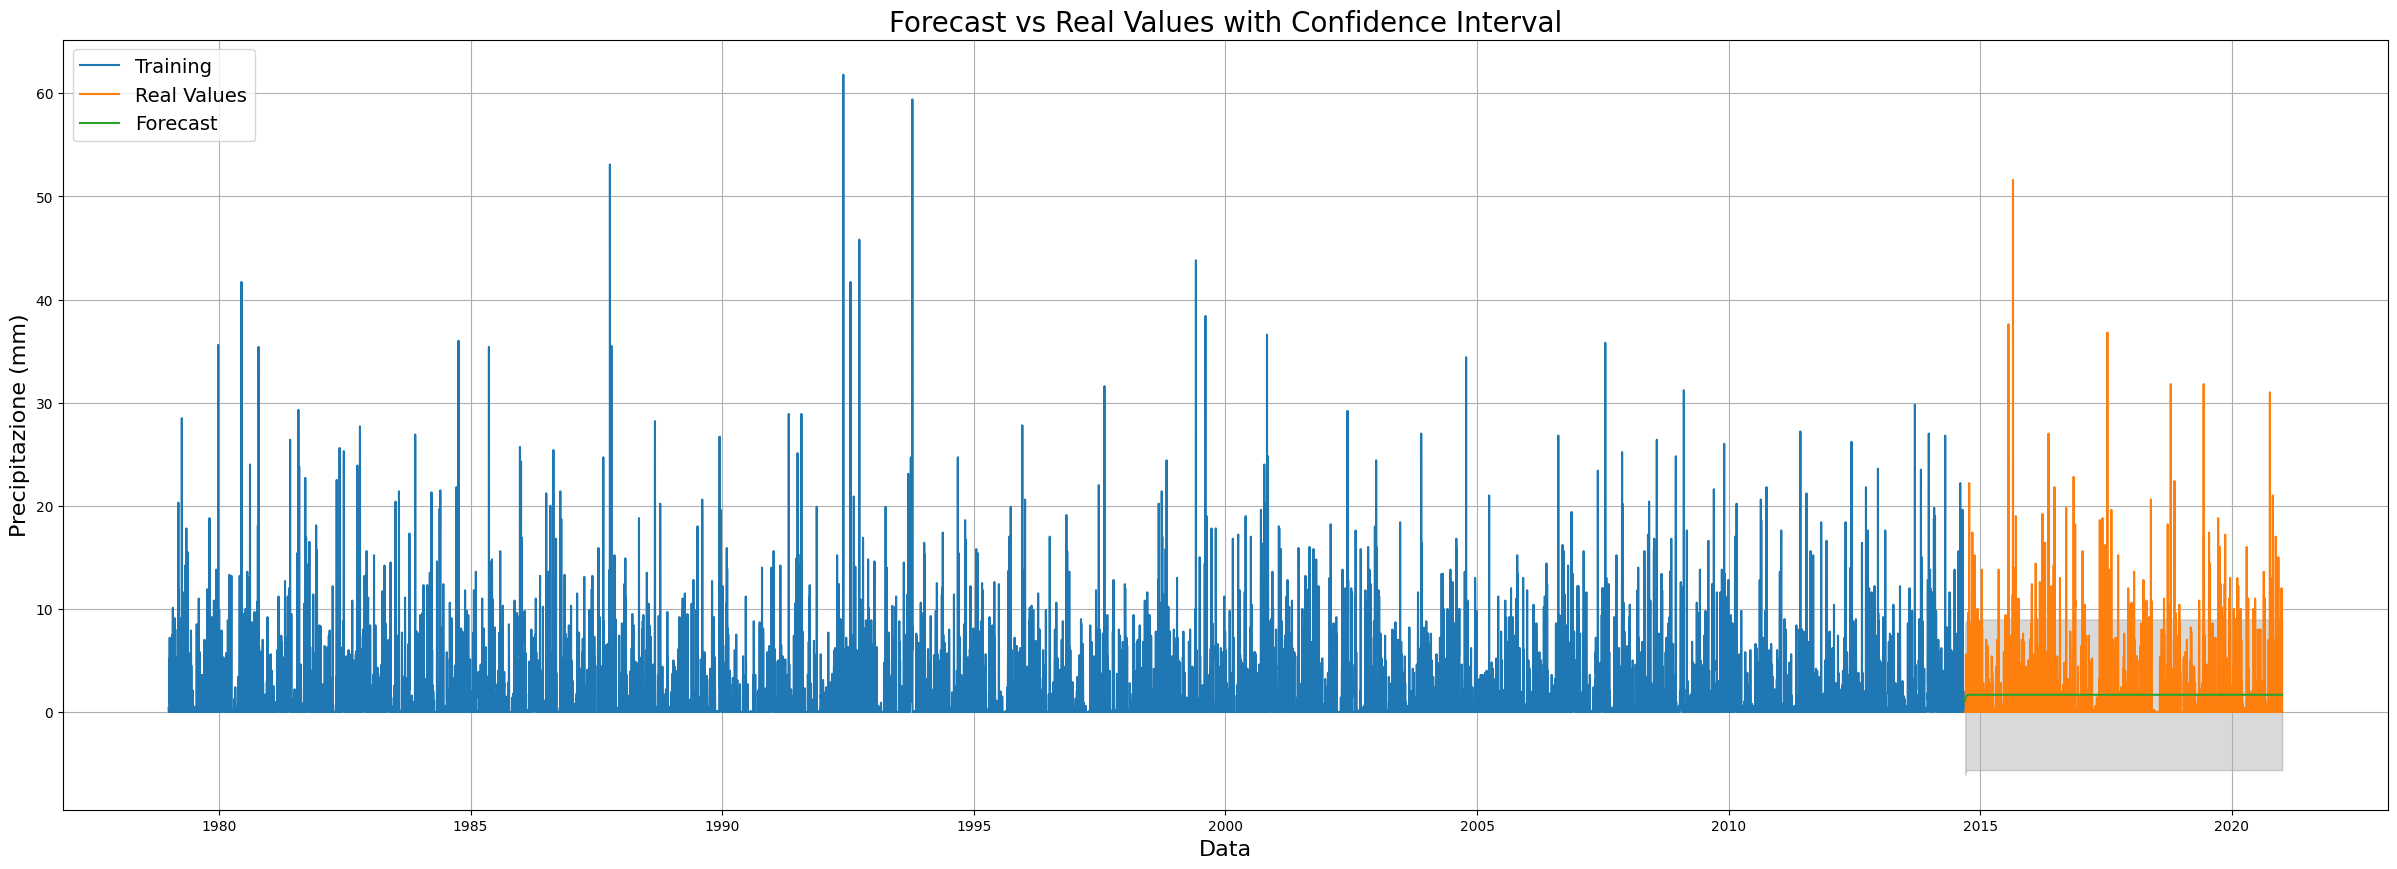

In [286]:
# Previsione sui dati di test con intervallo di confidenza
forecast_results = new_results.get_forecast(steps=test_part)
conf_int = forecast_results.conf_int(alpha=0.05)

# Estrai i limiti inferiore e superiore
lower_series = conf_int.iloc[:, 0]  # Limite inferiore
upper_series = conf_int.iloc[:, 1]  # Limite superiore

# Creazione del grafico con intervallo di confidenza reale
plt.figure(figsize=(30, 10), dpi=100)
plt.plot(train, label="Training")  # Dati di addestramento
plt.plot(test, label="Real Values")  # Dati reali
plt.plot(forecast_values, label="Forecast")  # Previsioni
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.15)  # Intervallo di confidenza
plt.title("Forecast vs Real Values with Confidence Interval", fontsize=20)
plt.legend(loc='upper left', fontsize=14)
plt.xlabel('Data', fontsize=16)
plt.ylabel('Precipitazione (mm)', fontsize=16)
plt.grid(True)
plt.show()




In [287]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Supponiamo che 'test' contenga i valori reali e 'forecast_values' le previsioni
y_true = test  # Dati reali (test)
y_pred = forecast_values  # Dati previsti (forecast_values)

# Calcolare RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calcolare MAE
mae = mean_absolute_error(y_true, y_pred)

# Calcolare MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calcolare ME (Mean Error)
me = np.mean(y_true - y_pred)

# Calcolare MPE (Mean Percentage Error)
mpe = np.mean(((y_true - y_pred) / y_true)) * 100

# Calcolare la correlazione
corr = np.corrcoef(y_true, y_pred)[0, 1]

# Calcolare MinMax (scalato tra 0 e 1)
minmax = np.min(y_pred) / np.max(y_pred)

# Stampa delle metriche
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"ME: {me}")
print(f"MPE: {mpe}")
print(f"Correlation: {corr}")
print(f"MinMax: {minmax}")


RMSE: 3.7841622711605147
MAE: 2.2362935961019454
MAPE: inf
ME: 0.018571609404152666
MPE: -inf
Correlation: 0.020582933405186483
MinMax: 0.6459130440617378


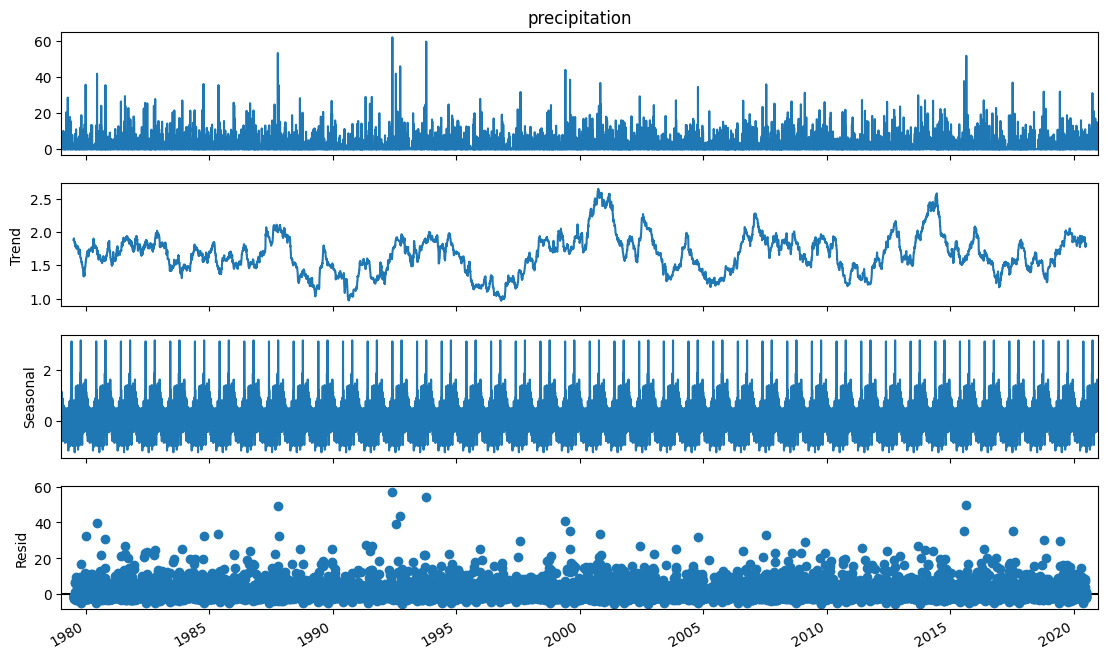

In [288]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt



# Seleziona una colonna e decomponi il segnale (periodo annuale di 365 giorni)
result = seasonal_decompose(data['precipitation'], model='additive', period=365)

# Migliora il layout del plot
fig = result.plot()
fig.set_size_inches(12, 8)

# Mostra le date correttamente formattate
plt.gcf().autofmt_xdate()
plt.show()

SERIE TEMPORALE CON max_temp

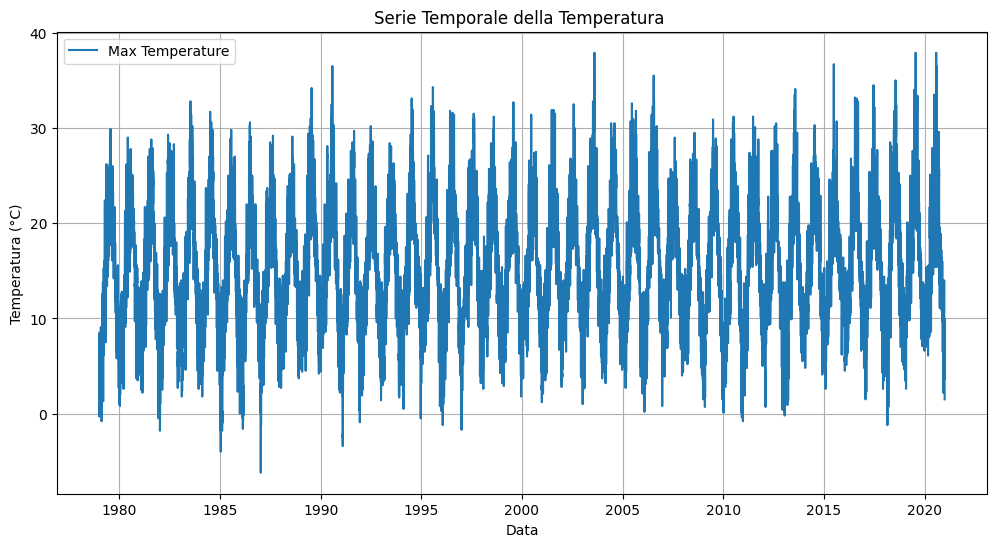

In [289]:
plt.figure(figsize=(12, 6))
plt.plot(data.index,  data['max_temp'], label='Max Temperature')
plt.title('Serie Temporale della Temperatura ')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.show()

In [290]:
from statsmodels.tsa.stattools import adfuller

# Test di stazionarietà con ADF
X = data['max_temp'].values
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -8.716745
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


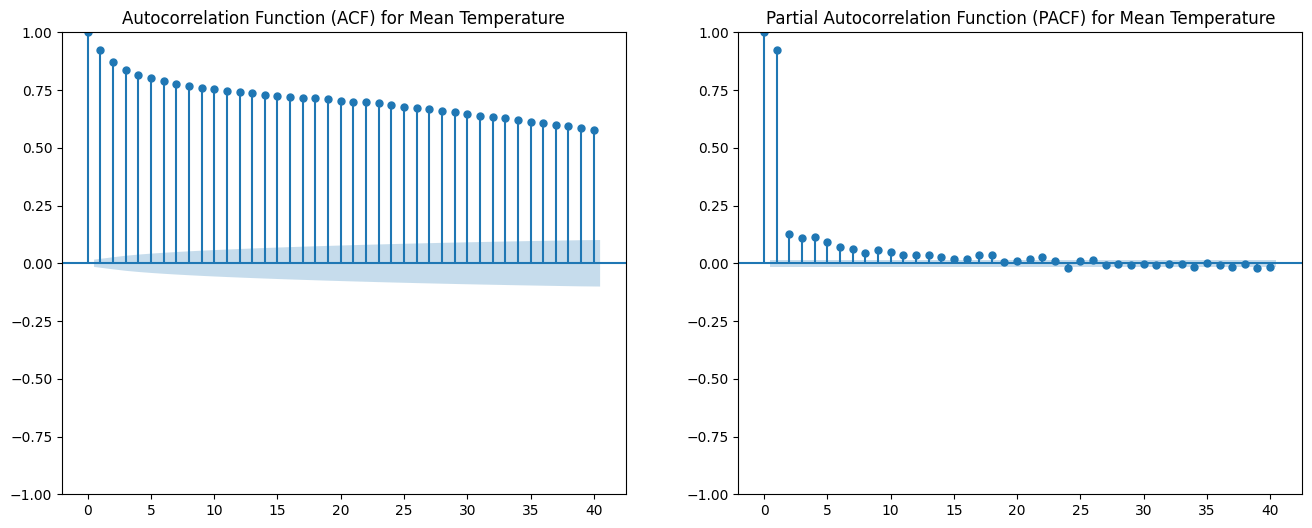

In [291]:
fig,axes = plt.subplots(1,2, figsize=(16,6))

#Plot ACF
plot_acf(data['max_temp'], ax = axes[0],lags = 40, title = 'Autocorrelation Function (ACF) for Mean Temperature')

#Plot PACF
plot_pacf(data['max_temp'], ax = axes[1],lags = 40, title = 'Partial Autocorrelation Function (PACF) for Mean Temperature')
plt.show()

In [292]:
# Costruisci il modello AR(1) - utilizzando SARIMAX
mod = sm.tsa.SARIMAX(data['max_temp'], order=(1, 0, 0), trend='c')
# Stima i parametri del modello
res = mod.fit()

# Stampa i risultati del modello AR(1)
print(res.summary())

C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               max_temp   No. Observations:                15341
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -35766.525
Date:                Wed, 29 Jan 2025   AIC                          71539.049
Time:                        17:06:16   BIC                          71561.964
Sample:                    01-01-1979   HQIC                         71546.644
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1498      0.052     21.958      0.000       1.047       1.252
ar.L1          0.9252      0.003    321.474      0.000       0.920       0.931
sigma2         6.2016      0.057    108.195      0.0

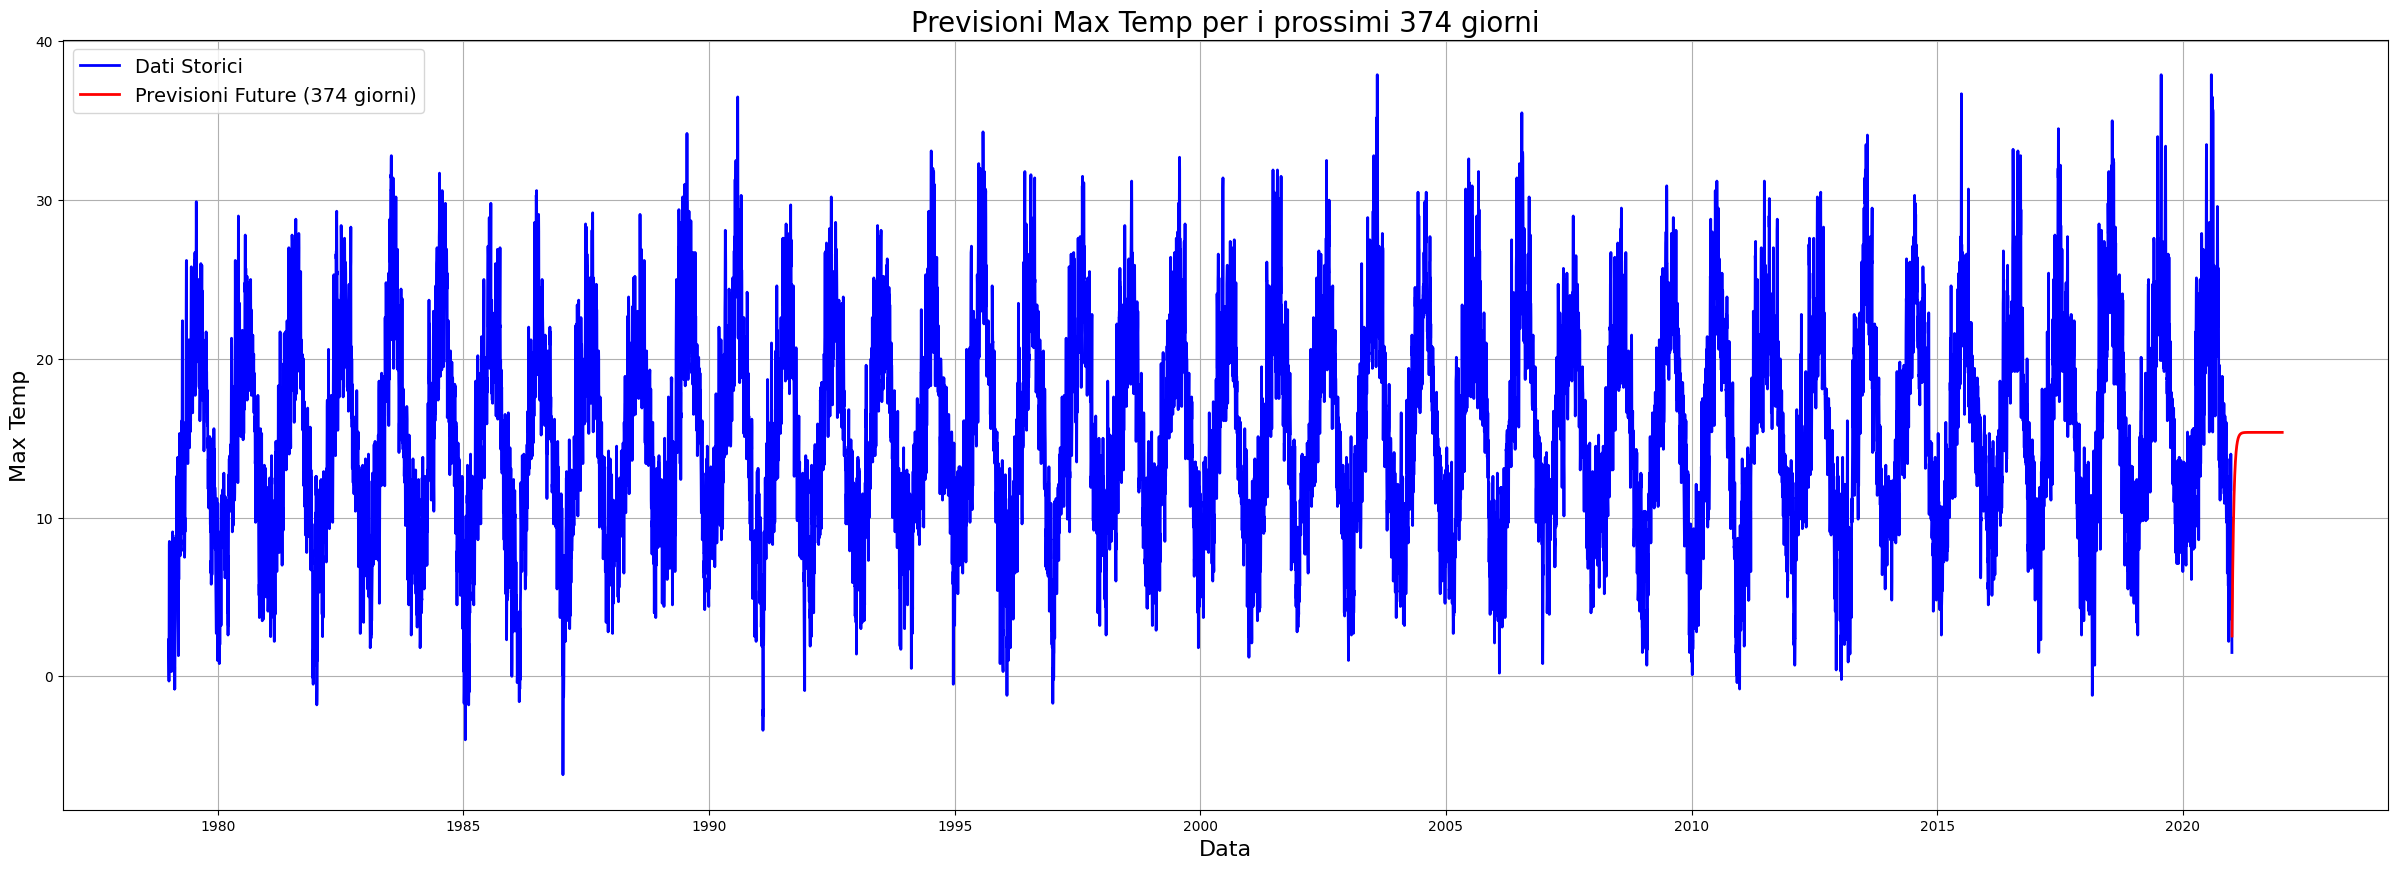

In [293]:
# Previsione per i prossimi 374 giorni (come hai richiesto)
forecast_steps = 374
forecast = res.get_prediction(start=len(data), end=len(data) + forecast_steps - 1, dynamic=False)

# Creazione dell'indice per la previsione futura
forecast_index = pd.date_range(data.index[-1], periods=forecast_steps + 1, freq='D')[1:]

# Estrai i valori di previsione
forecast_values = forecast.predicted_mean

# Creazione del grafico
plt.figure(figsize=(30, 10), dpi=100)
plt.plot(data.index, data['max_temp'], label='Dati Storici', color='b', linewidth=2)
plt.plot(forecast_index, forecast_values, label='Previsioni Future (374 giorni)', color='r', linewidth=2)
plt.title('Previsioni Max Temp per i prossimi 374 giorni', fontsize=20)
plt.xlabel('Data', fontsize=16)
plt.ylabel('Max Temp', fontsize=16)
plt.legend(loc='upper left', fontsize=14)
plt.grid(True)
plt.show()

In [294]:
# Divisione dei dati in training e test (85% e 15%)
train_part = int(len(data) * 0.85)  # 85% dei dati per il training
test_part = len(data) - train_part  # 15% dei dati per il testing

train = data['max_temp'][:train_part]
test = data['max_temp'][train_part:]

# Costruzione del modello ARIMA
new_model = sm.tsa.ARIMA(train, order=(1, 0, 3))  # Modello ARIMA (1, 0, 3)
# Stima dei parametri del modello
new_results = new_model.fit()

# Stampa i risultati del modello
print(new_results.summary())

# Previsione sui dati di test (opzionale, se desideri fare un confronto con i dati reali)
forecast_values = new_results.forecast(steps=test_part)

C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MrWhi\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               max_temp   No. Observations:                13039
Model:                 ARIMA(1, 0, 3)   Log Likelihood              -29820.856
Date:                Wed, 29 Jan 2025   AIC                          59653.712
Time:                        17:06:19   BIC                          59698.566
Sample:                    01-01-1979   HQIC                         59668.696
                         - 09-12-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2321      0.624     24.407      0.000      14.009      16.455
ar.L1          0.9849      0.002    584.785      0.000       0.982       0.988
ma.L1         -0.2411      0.008    -29.078      0.0

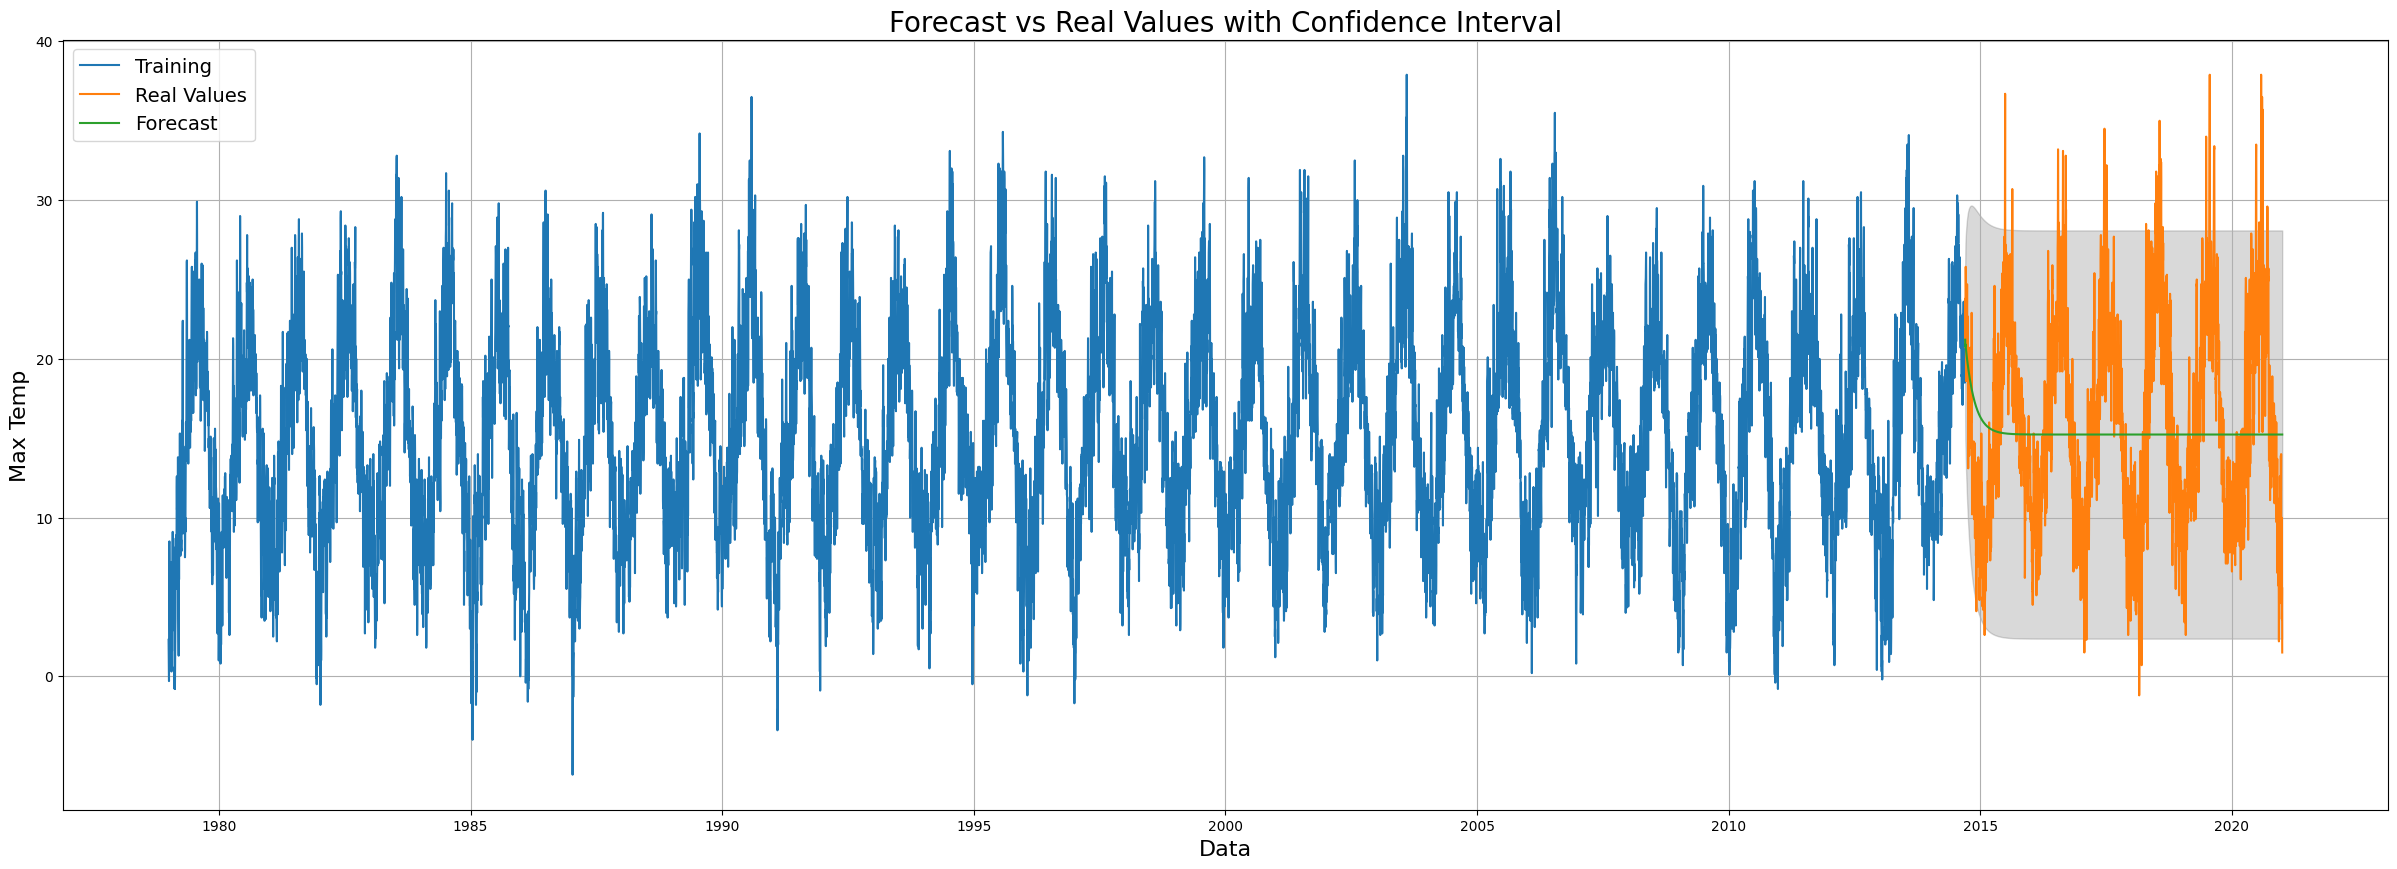

In [295]:
# Previsione sui dati di test con intervallo di confidenza
forecast_results = new_results.get_forecast(steps=test_part)
conf_int = forecast_results.conf_int(alpha=0.05)

# Estrai i limiti inferiore e superiore
lower_series = conf_int.iloc[:, 0]  # Limite inferiore
upper_series = conf_int.iloc[:, 1]  # Limite superiore

# Creazione del grafico con intervallo di confidenza reale
plt.figure(figsize=(30, 10), dpi=100)
plt.plot(train, label="Training")  # Dati di addestramento
plt.plot(test, label="Real Values")  # Dati reali
plt.plot(forecast_values, label="Forecast")  # Previsioni
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.15)  # Intervallo di confidenza
plt.title("Forecast vs Real Values with Confidence Interval", fontsize=20)
plt.legend(loc='upper left', fontsize=14)
plt.xlabel('Data', fontsize=16)
plt.ylabel('Max Temp', fontsize=16)
plt.grid(True)
plt.show()

In [296]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Supponiamo che 'test' contenga i valori reali e 'forecast_values' le previsioni
y_true = test  # Dati reali (test)
y_pred = forecast_values  # Dati previsti (forecast_values)

# Calcolare RMSE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

# Calcolare MAE
mae = mean_absolute_error(y_true, y_pred)

# Calcolare MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calcolare ME (Mean Error)
me = np.mean(y_true - y_pred)

# Calcolare MPE (Mean Percentage Error)
mpe = np.mean(((y_true - y_pred) / y_true)) * 100

# Calcolare la correlazione
corr = np.corrcoef(y_true, y_pred)[0, 1]

# Calcolare MinMax (scalato tra 0 e 1)
minmax = np.min(y_pred) / np.max(y_pred)

# Stampa delle metriche
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"ME: {me}")
print(f"MPE: {mpe}")
print(f"Correlation: {corr}")
print(f"MinMax: {minmax}")



RMSE: 6.633472090434916
MAE: 5.4616591568835515
MAPE: 48.000137211759295
ME: 0.8369182541966794
MPE: -20.172556542665195
Correlation: -0.029222686685867378
MinMax: 0.7183230545617368


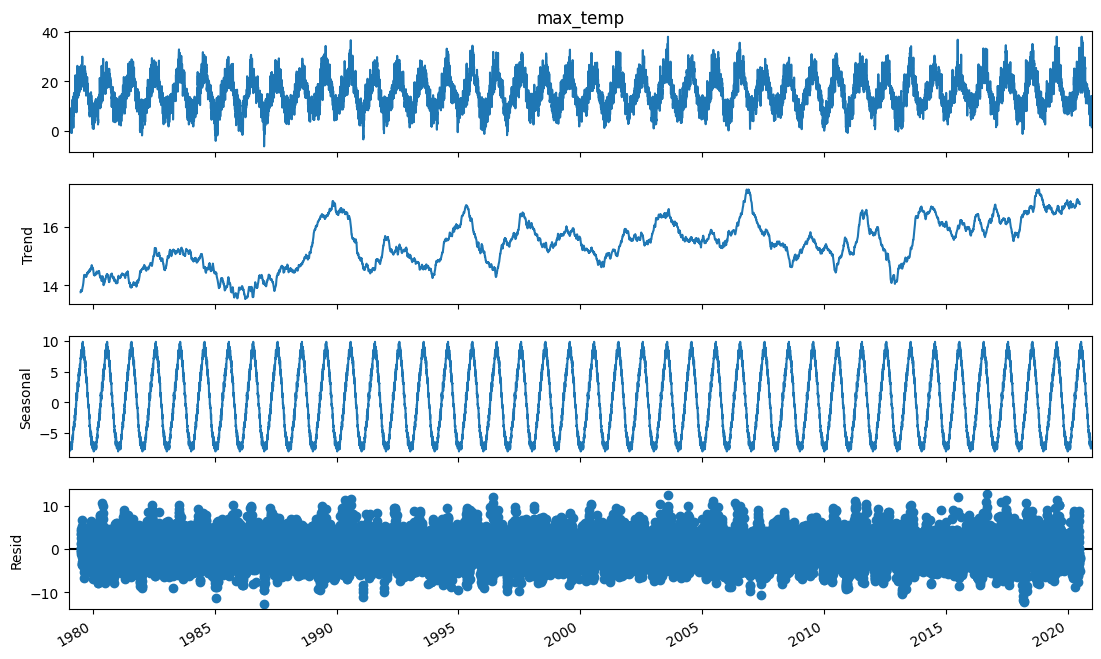

In [297]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt



# Seleziona una colonna e decomponi il segnale (periodo annuale di 365 giorni)
result = seasonal_decompose(data['max_temp'], model='additive', period=365)

# Migliora il layout del plot
fig = result.plot()
fig.set_size_inches(12, 8)

# Mostra le date correttamente formattate
plt.gcf().autofmt_xdate()
plt.show()